This Notebook one of my first is intended to analyse weekly data from epidemiologic surveillance. Every week the Health District collect data from differents Health zone in a well specified support.After being computerized with Epi info these data are exported in an excel spreadsheet. this notebook will help people working at the Health district to quickly generate graphical analysis every week. it's based on the excel spreedsheet that is a csv file

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data2 = pd.read_csv("HLOIDS.csv")
data1 = pd.read_csv("HLOIDS38.csv")

In [117]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NUM         3916 non-null   object 
 1   PAYS        3916 non-null   object 
 2   PROV        3916 non-null   object 
 3   ZS          3915 non-null   object 
 4   POP         3909 non-null   float64
 5   NUMSEM      3915 non-null   float64
 6   DEBUTSEM    3916 non-null   object 
 7   MALADIE     3913 non-null   object 
 8   C328TNN     23 non-null     float64
 9   DTNN        29 non-null     float64
 10  C011MOIS    3911 non-null   float64
 11  D011MOIS    3910 non-null   float64
 12  C1259MOIS   3911 non-null   float64
 13  D1259MOIS   3912 non-null   float64
 14  C515ANS     3881 non-null   float64
 15  D515ANS     3879 non-null   float64
 16  CP15ANS     3881 non-null   float64
 17  DP15ANS     3879 non-null   float64
 18  TOTALCAS    3915 non-null   float64
 19  TOTALDECES  3915 non-null  

In [118]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
POP,3909.0,180784.048862,63772.484298,10682.0,138648.0,198921.0,230602.0,245780.0
NUMSEM,3915.0,20.214049,10.880954,1.0,11.0,21.0,29.0,38.0
C328TNN,23.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DTNN,29.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
C011MOIS,3911.0,55.344925,80.408499,0.0,0.0,12.0,86.0,463.0
D011MOIS,3910.0,0.069309,0.362694,0.0,0.0,0.0,0.0,7.0
C1259MOIS,3911.0,101.949374,151.554663,0.0,2.0,23.0,165.5,970.0
D1259MOIS,3912.0,0.142382,1.231946,0.0,0.0,0.0,0.0,69.0
C515ANS,3881.0,59.932234,97.836932,0.0,1.0,11.0,84.0,648.0
D515ANS,3879.0,0.021139,0.177562,0.0,0.0,0.0,0.0,5.0


We need just few columns to proceed our analysis, most of columns are same variable splitted in differents age group, so our focus will be on the total number of cases and some other columns related to geographic information

In [119]:
data1.columns


Index(['NUM', 'PAYS', 'PROV', 'ZS', 'POP', 'NUMSEM', 'DEBUTSEM', 'MALADIE',
       'C328TNN', 'DTNN', 'C011MOIS', 'D011MOIS', 'C1259MOIS', 'D1259MOIS',
       'C515ANS', 'D515ANS', 'CP15ANS', 'DP15ANS', 'TOTALCAS', 'TOTALDECES',
       'LETAL', 'ATTAQ'],
      dtype='object')

In [120]:
selection = ['ZS','NUMSEM','MALADIE','TOTALCAS', 'TOTALDECES', 'LETAL', 'ATTAQ']
data1 = data1[selection]
data1.shape

(3916, 7)

In [121]:
data1.describe()

,NUMSEM,TOTALCAS,TOTALDECES,LETAL,ATTAQ
count,3915.000000,3915.000000,3915.000000,3914.000000,3836.000000
mean,20.214049,286.517752,0.262069,2.561063,161.098827
std,10.880954,424.490116,1.409610,14.531124,220.658784
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,7.000000,0.000000,0.000000,4.100000
50%,21.000000,60.000000,0.000000,0.000000,35.700000
75%,29.000000,452.500000,0.000000,0.000000,263.200000
max,38.000000,2561.000000,69.000000,100.000000,996.000000


We'll need differents subset of our data:
    The first one is the subset of all data for the present week(38)
    The second subset will deal with tendency of desease, it will a series of all cases during the last 20 weeks

In [145]:
week = int(data1["NUMSEM"].max())
subset1 = data1[data1["NUMSEM"]==week]
subset1[["TOTALCAS","MALADIE"]].groupby(["MALADIE"]).sum()
desease = subset1["MALADIE"].unique()
desease

array(['DECES MATERNELS', 'FIEVRE TYPHOIDE', 'IRA', 'PALUDISME SUSP',
       'PALUDISME CONF', 'ROUGEOLE', 'PNEUMONIE', 'CHOLERA',
       'DIARRHEE DHY M5', 'MENINGITE', 'PFA', 'DIARR SANGLANTE', 'GRIPPE',
       'PESTE'], dtype=object)

There are extra spaces in our "MALADIE" column that we should get rid of

In [99]:
data1.head()

,ZS,NUMSEM,MALADIE,TOTALCAS,TOTALDECES,LETAL,ATTAQ
0,KAMINA,13.0,FIEVRE TYPHOIDE,80.0,0.0,0.0,35.5
1,KAMINA,13.0,IRA,265.0,0.0,0.0,117.6
2,KAMINA,13.0,PALUDISME CONF,120.0,1.0,1.0,53.2
3,KAMINA,13.0,PALUDISME SUSP,422.0,0.0,0.0,187.2
4,KAMINA,13.0,FIEVRE TYPHOIDE,2.0,0.0,0.0,0.9


In [126]:
data1.head()

,ZS,NUMSEM,MALADIE,TOTALCAS,TOTALDECES,LETAL,ATTAQ
0,KAMINA,13.0,FIEVRE TYPHOIDE,80.0,0.0,0.0,35.5
1,KAMINA,13.0,IRA,265.0,0.0,0.0,117.6
2,KAMINA,13.0,PALUDISME CONF,120.0,1.0,1.0,53.2
3,KAMINA,13.0,PALUDISME SUSP,422.0,0.0,0.0,187.2
4,KAMINA,13.0,FIEVRE TYPHOIDE,2.0,0.0,0.0,0.9


Most of the Analysis can be performed if we have specific pivot table:

ACUTE RESPITATORY INFECTION

<AxesSubplot:xlabel='ZS'>

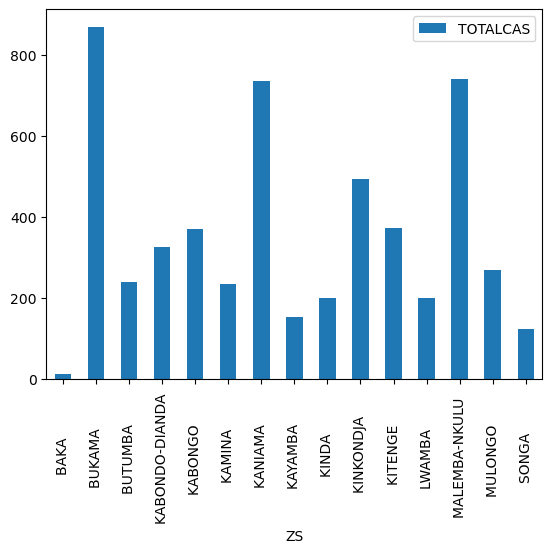

In [129]:
ARI = subset1[subset1["MALADIE"]== desease[2]]
ARI = ARI[["ZS","TOTALCAS"]].groupby(["ZS"]).sum()
ARI.plot(kind = "bar")

<function matplotlib.pyplot.show(close=None, block=None)>

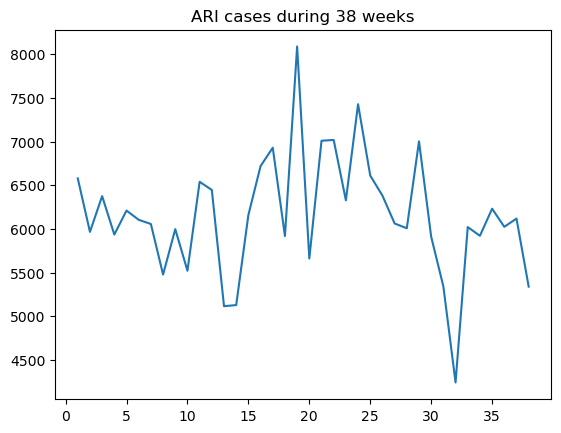

In [146]:
ARI2 = data1[data1["MALADIE"]==desease[2]]
#ARI2 = data1.loc[(data1["MALADIE"] ==desease[2])& (data1["NUMSEM"].isin(list(range(week-20,week+1)))),:]
ARI2 = ARI2[["NUMSEM","TOTALCAS"]].groupby(["NUMSEM"]).sum()

#a = list(range(week-20,week +1))
a = list(np.arange(1,week+1))
plt.plot(a,ARI2["TOTALCAS"])
plt.title(f"ARI cases during {int(week)} weeks")
plt.show


Let's create a function that will help us doing things quickly

In [147]:

def bar_survepi(illness,week):
    "A function to plot a bar plot of different diseases during a specific week"
    subset1 = data1[data1["NUMSEM"]==week]
    cases = subset1[subset1["MALADIE"]== desease[illness]]
    cases = cases[["ZS","TOTALCAS"]].groupby(["ZS"]).sum()
    cases.plot(kind = "bar")

Let'try this function for Malaria during 38 week, week is then 38 and for illness, malaria indices in the list desease = 4. Let give it a try

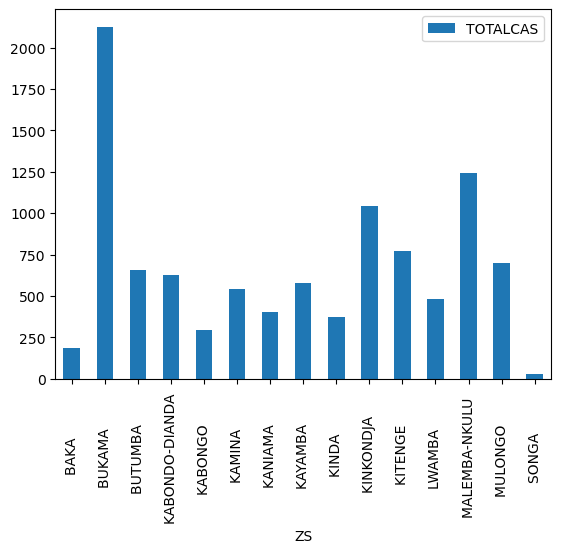

In [148]:
bar_survepi(4,38)

Great!

In [149]:
data1.dtypes.value_counts()

float64    5
object     2
dtype: int64

<AxesSubplot:xlabel='NUMSEM'>

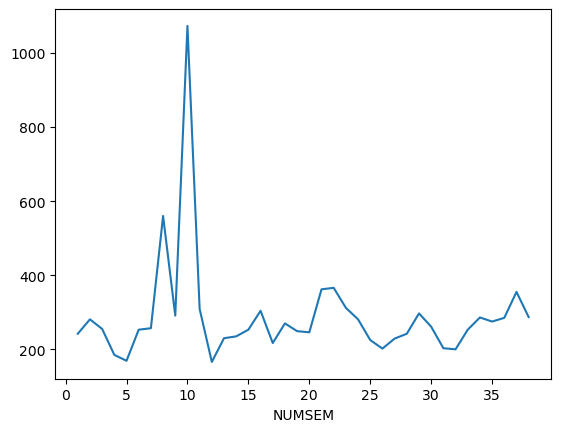

In [150]:
ex  = data1.pivot_table("TOTALCAS",index="MALADIE", columns= "NUMSEM",aggfunc = sum,)
ex#.filter(ex["MALADIE"]==d
ex.iloc[10,0:len(ex.columns)].plot(kind = "line")

<AxesSubplot:xlabel='ZS'>

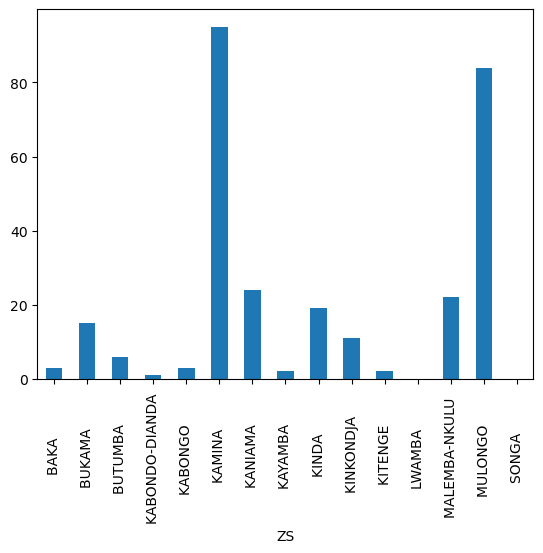

In [151]:
ex2  = data1.pivot_table("TOTALCAS",index="MALADIE", columns= ["NUMSEM","ZS"],aggfunc = sum,)
ex2#.filter(ex["MALADIE"]==d
#ex2.iloc[10,0:len(ex.columns)].plot(kind = "bar")
ex2[38].iloc[10,0:16].plot(kind = "bar")


In [83]:
data1.size


27412